In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

TF-IDF (Term Frequency - Inverse Document Frequency) is a technique used in Natural Language Processing (NLP) to convert text into numerical features. It helps in determining the importance of a word in a document relative to a collection of documents (corpus).
* Term Frequency (TF): Measures how often a word appears in a document.
* Inverse Document Frequency (IDF): Measures how important a word is by reducing the weight of commonly used words.
  
* Higher TF-IDF value → The word is important in the document (appears frequently but not in many documents).
* Lower TF-IDF value → The word is less important (either appears rarely in the document or is common across all documents).

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
documents = [
    "This is a sample document.",
    "This document is another example.",
    "Example text data processing."
]
vectorizer=TfidfVectorizer(stop_words='english') ## removes words like the,is,are
tfidf_doc=vectorizer.fit_transform(documents)

## important features
feature_names=vectorizer.get_feature_names_out() ## stored import words
print(feature_names)

##displaying importance of words in each sentence
tfidf_df=pd.DataFrame(tfidf_doc.toarray(),columns=feature_names)
tfidf_df

['data' 'document' 'example' 'processing' 'sample' 'text']


,data,document,example,processing,sample,text
0,0.000000,0.605349,0.000000,0.000000,0.795961,0.000000
1,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000
2,0.528635,0.000000,0.402040,0.528635,0.000000,0.528635


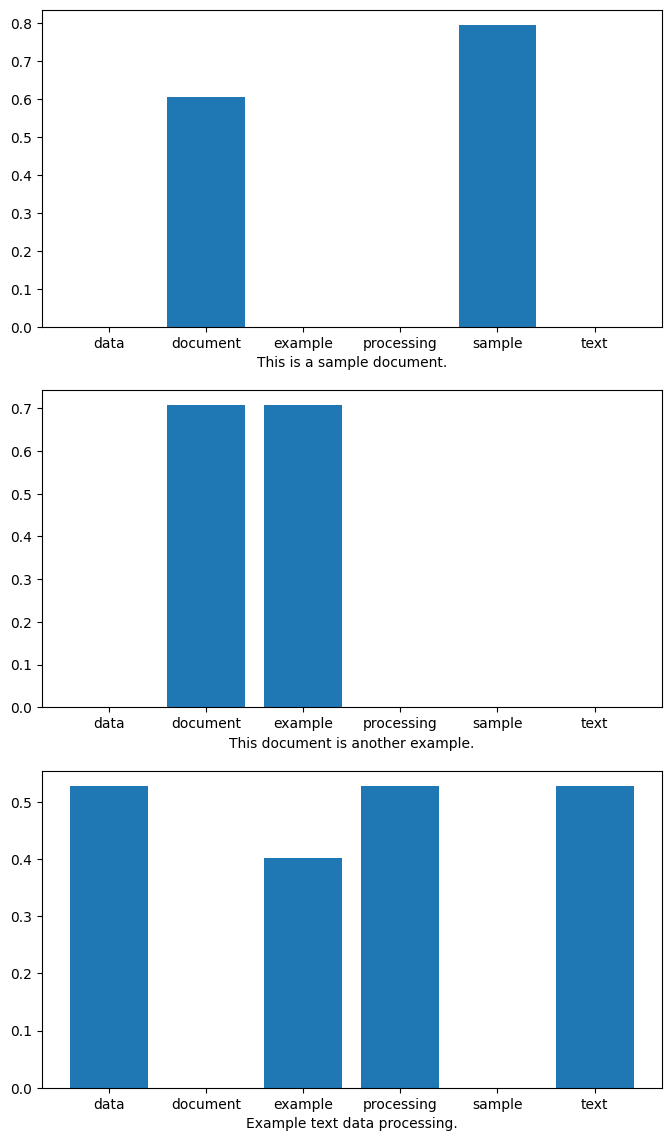

In [69]:
df=tfidf_doc.toarray()
fig,axes=plt.subplots(3,1,figsize=(8,14))
for ax,(idx,f) in zip(axes,enumerate(df)):
  ax.bar(feature_names,f)
  ax.set_xlabel(f"{documents[idx]}")